### Conv2d Layer Example ###

Each filter in a Conv2d layer convolves across all three channels (red, green, and blue) of an RGB image. The convolution operation computes the dot product of the filter weights with each corresponding 3x3 patch of the image (or larger if using a larger filter size).

Here's how the convolution operation works:

    The filter slides over the input image one pixel at a time, computing the dot product of its weights with each corresponding 3x3 patch of the image.

    For each position of the filter, the dot product is computed separately for each of the three color channels, and the results are summed to produce a single value.

    The resulting set of values is arranged in a 3D tensor that represents the output feature map for this filter.

In [1]:
import torch
import torch.nn as nn # neural networks that have the convolutional layers like Conv2d, MaxPool2d, etc.
from torchvision.utils import make_grid
from torchvision.io import read_image

from matplotlib import pyplot as plt
import numpy as np

In [2]:
conv_layer = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=7, stride=1, padding=0)

'''
Create a convolutional layer:
    * 3-channel RGB image
    * 16 filters to be initialized
    * 7x7 kernel size
    * stride of 1
    * no padding
'''

'\nCreate a convolutional layer:\n    * 3-channel RGB image\n    * 16 filters to be initialized\n    * 7x7 kernel size\n    * stride of 1\n    * no padding\n'

In [3]:
# Feed an input with the right shape to the convolution layer
# It expects a tensor with the following dimensions - batch_size, channels, height, width

input_tensor = torch.randn(1, 3, 224, 224) # randomly generate an image (batch-size = 1), that is 3 channels (RGB img), that is a size of 224 x 224
output_tensor = conv_layer(input_tensor) # Feed it to the convolution layer
print(f"Output shape should be batch_size x number _channels x image_size: {output_tensor.shape}") # Print the output shape

'''((224 image size - 7 kernal size) / 1 stride)+ 1 = 218'''

Output shape should be batch_size x number _channels x image_size: torch.Size([1, 16, 218, 218])


'((224 image size - 7 kernal size) / 1 stride)+ 1 = 218'

### Let us do the convolution on an image ###

Shape of Image is: (196, 257, 3)


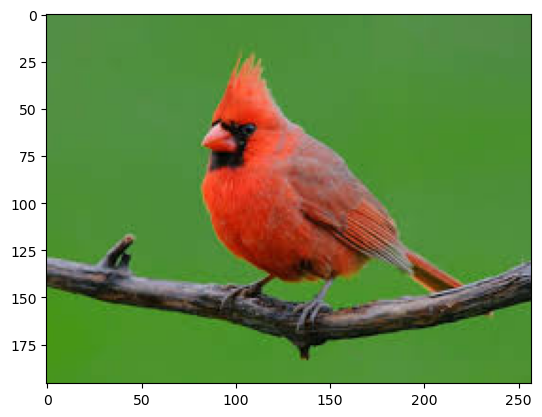

Image Data Type: <class 'torch.Tensor'>

Image Shape: torch.Size([1, 3, 196, 257])


In [5]:
# Load an image from the disk
img = plt.imread('bird.jpg') # Load image
print(f"Shape of Image is: {img.shape}") # Print the shape of the image

# Dipslay image
plt.imshow(img) # Display the image
plt.show() # Show the

# Process the image array to make it suitable to feed the PyTorch's Conv2d layer
img = np.moveaxis(img,2,0) # move the 2nd index to the 0th index to change image from 196x257x3 to 3x196x257
img = img.reshape(1,img.shape[0],img.shape[1],img.shape[2]) # Further reshape to add the batch size to the dimension: In this case a single image to make it 1x3x196x257

 # Convert the numpy array to a tensor
img = torch.tensor(img,dtype=torch.float32) # read in a torch tensor to convert the image to a tensor
print(f"Image Data Type: {type(img)}\n\nImage Shape: {img.size()}") # Print the data type and shape of the image


In [6]:
images = conv_layer(img) # Run the image through the conv layer created above
print(f"Convolved Image Shape: {images.size()} and type: {type(images)}") # the convolved image shape and type, where we should have 16 channels

Convolved Image Shape: torch.Size([1, 16, 190, 251]) and type: <class 'torch.Tensor'>


In [7]:
# The convolution layers output should usually go to an activation function
relu1 = nn.ReLU(inplace=False) # Instantiate the ReLu activation function

# Write a function create 3 convolution layers and to take an image through the 3 layers
# Final output should have 64 convovled images and image size should be:
def conv(x, relu): # Function to take an image through 3 convolution layers (take in input image and activation function)
    
    conv_layer2 = nn.Conv2d(in_channels=3, out_channels=24, kernel_size=2, stride=2, padding=0) # Conv layer 1
    x = conv_layer2(x) # Feed the image to the convolution layer
    x = relu1(x) # Pass the output through the ReLu activation function
    
    conv_layer3 = nn.Conv2d(in_channels=24, out_channels=48, kernel_size=2, stride=2, padding=0) # Conv layer 2
    x = conv_layer3(x) # Feed the image to the convolution layer
    x = relu1(x) # Pass the output through the ReLu activation function
    
    conv_layer4 = nn.Conv2d(in_channels=48, out_channels=64, kernel_size=3, stride=2, padding=0) # Conv layer 3
    x = conv_layer4(x) # Feed the image to the convolution layer
    x = relu1(x) # Pass the output through the ReLu activation function
    
    return x # Return the output that went through 3 convolution layers

In [14]:
# Let us compute to see what the final image size should be after going through 3 Convolution layers
# We use the formula: (image size + 2*padding - kernel size)/stride +1 for each layer
# If image height and width are different, then we compute separately for each
print(f"Image dimension 196 reduces after 3 conv layers to: {(((((196-2)/2 + 1)-2)/2 + 1) - 3)/2 +1}") # Dimension 1
print(f"Image dimension 257 reduces after 3 conv layers to: {(((((257-2)/2 + 1)-2)/2 + 1) - 3)/2 +1}") # Dimension 2
print("3 channels reduce to 64 channels") # Channels

'''
We get decimal points because we used even kernel sizes and strides, which is not common in practice.
'''

Image dimension 196 reduces after 3 conv layers to: 24.0
Image dimension 257 reduces after 3 conv layers to: 31.625
3 channels reduce to 64 channels


'\nWe get decimal points because we used even kernel sizes and strides, which is not common in practice.\n'

In [9]:
# Call the function by feeding in the image and the activation function
im_np = conv(img,relu1)  # send out image through the 3 convolution layers to get an output tensor
im_np = im_np.detach().numpy().squeeze() # detach the tensor, remove the batch size extra dimension of 1, and convert to numpy array
print(f"Shape of output: {im_np.shape}") # Print the shape of the output

Shape of output: (64, 24, 31)


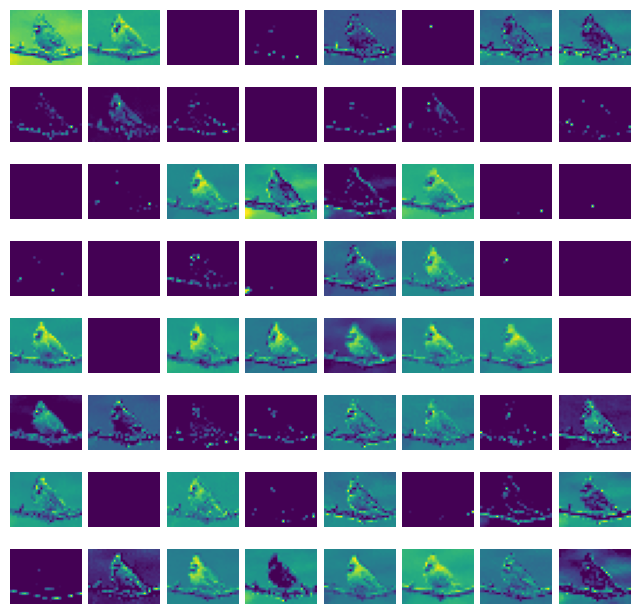

In [15]:
# Let us plot these 64 images and see what the different filters have done to the images since every image now is a feature map of the original image

# Create a figure with 8x8 subplots
fig1, ax1 = plt.subplots(nrows=8, ncols=8, figsize=(8,8)) # Create a figure with 8x8 subplots

# Plot each image in a separate subplot
for i, axi in enumerate(ax1.flat): # Loop through the subplots
    axi.axis('off') # Turn off the axis
    axi.imshow(im_np[i]/255) # Display the image
    
# Display the figure
fig1.subplots_adjust(wspace=0.1, hspace=0) # Adjust the space between the subplots
plt.show() # Show the figure